# Loan Data Exploration
## by Yaron Shamash

## Preliminary Wrangling

This document explores a dataset containing loan amounts, borrower information, and interest rates for approximately 114,000 loans.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
loans= pd.read_csv('prosperLoanData.csv')

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
print(loans.shape)
print(loans.dtypes)
print(loans.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   


### What is the structure of your dataset?

Number of observations (data points): There are 113,937 with 81 columns describing the data. The characteristics of the variables in the data set. Which includes: dtypes: bool(3), category(1), float64(50), int64(11), object(17) How many are discrete/continuous

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the APR or interest rate of the loans in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the loan amount will have the strongest effect on each loan's APR: the larger the loan, the higher the interest rate. I also think that other factors such as borrower credit rating, debt/income ratio and income will have effects on the APR, though to a much smaller degree than the main effect of loan amount.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: loan APR.

In [6]:
loans.duplicated().sum()

0

In [7]:
loans.duplicated(subset='LoanNumber').sum()

871

In [8]:
loans.drop_duplicates('LoanNumber',inplace=True)

In [9]:
loans.duplicated().sum()

0

In [10]:
loans.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84113
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

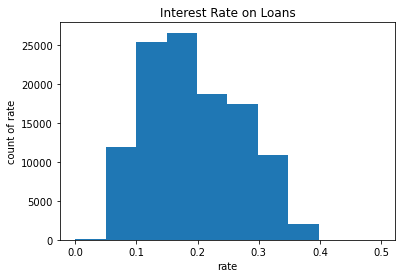

In [11]:
plt.hist(data = loans, x = 'BorrowerRate')
plt.title('Interest Rate on Loans')
plt.xlabel('rate')
plt.ylabel('count of rate')
plt.show()

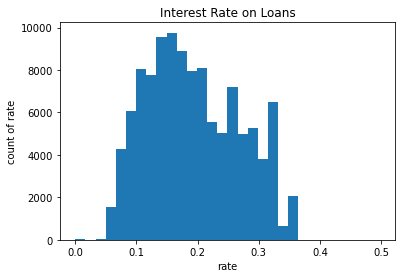

In [12]:
plt.hist(data = loans, x = 'BorrowerRate', bins=30)
plt.title('Interest Rate on Loans')
plt.xlabel('rate')
plt.ylabel('count of rate')
plt.show()

In [13]:
loans.BorrowerRate.describe()

count    113066.000000
mean          0.192946
std           0.074917
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250600
max           0.497500
Name: BorrowerRate, dtype: float64

In [14]:
# to set the scale
np.log10(loans.BorrowerRate.describe())

C:\Users\Yaron\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.053332
mean    -0.714565
std     -1.125422
min          -inf
25%     -0.872895
50%     -0.735182
75%     -0.601019
max     -0.303207
Name: BorrowerRate, dtype: float64

In [15]:
loans['BorrowerRateShifted']=loans['BorrowerRate']+1

In [16]:
loans.BorrowerRateShifted.describe()

count    113066.000000
mean          1.192946
std           0.074917
min           1.000000
25%           1.134000
50%           1.184000
75%           1.250600
max           1.497500
Name: BorrowerRateShifted, dtype: float64

In [17]:
np.log10(loans.BorrowerRateShifted.describe())

count    5.053332
mean     0.076621
std     -1.125422
min      0.000000
25%      0.054613
50%      0.073352
75%      0.097118
max      0.175367
Name: BorrowerRateShifted, dtype: float64

Notice that the statistics has -inf for the value of min. This is because log10 of 0 is infinity. One way to correct this is by adding 1 to all `BorrowerRate` values as shown above.

In [18]:
bins = 10** (np.arange(0,np.log10(loans.BorrowerRateShifted.max()) + 0.01, 0.01))
bins = [round(x,3) for x in bins]

In [19]:
print(bins)

[1.0, 1.023, 1.047, 1.072, 1.096, 1.122, 1.148, 1.175, 1.202, 1.23, 1.259, 1.288, 1.318, 1.349, 1.38, 1.413, 1.445, 1.479, 1.514]


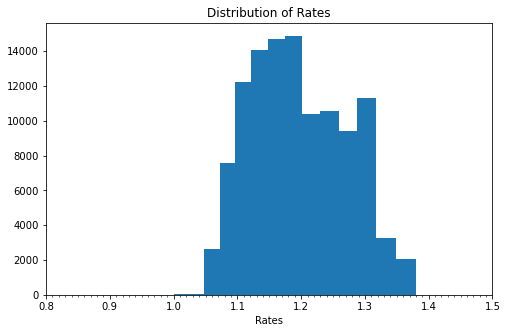

In [20]:
plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'BorrowerRateShifted', bins = bins)
plt.title('Distribution of Rates')
plt.xlabel('Rates')
plt.gca().set_xticks(np.arange(0.1, 1.5, 0.01), minor = True)
plt.xlim([0.8,1.5])
plt.show()

The data on rates appears to be normal and slighly skewed to the right.  A couple areas with of intrest are arouns the .25 and .32 and .35 outlier peaks.  A log 

Notice that the statistics has -inf for the value of min. This is because log10 of 0 is infinity. One way to correct this is by adding 1 to all `BorrowerRate` values as shown above.

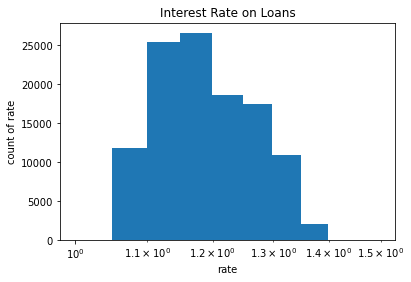

In [21]:
plt.hist(data = loans, x= 'BorrowerRateShifted')
plt.xscale('log')
plt.title('Interest Rate on Loans')
plt.xlabel('rate')
plt.ylabel('count of rate')
plt.show();

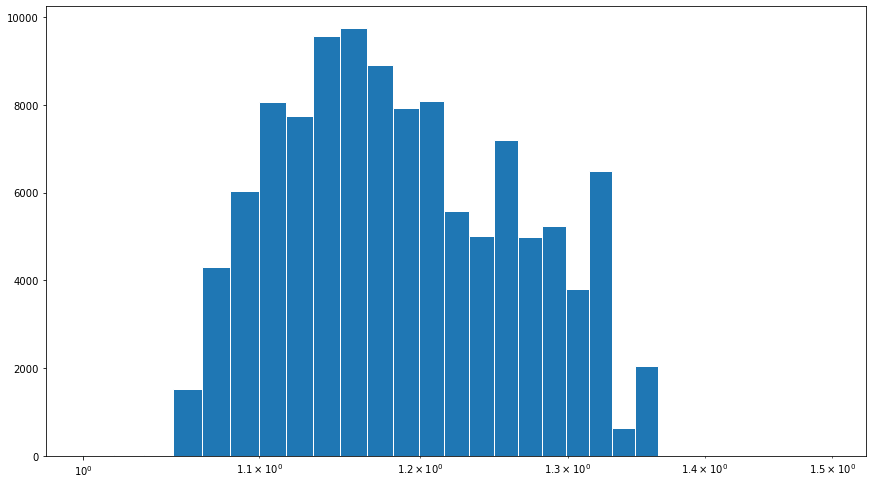

In [22]:
plt.figure(figsize=[14.70, 8.27])
n, bins, patches = plt.hist(data = loans, x  = 'BorrowerRateShifted',
                            bins = 30, edgecolor = "white")

# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')


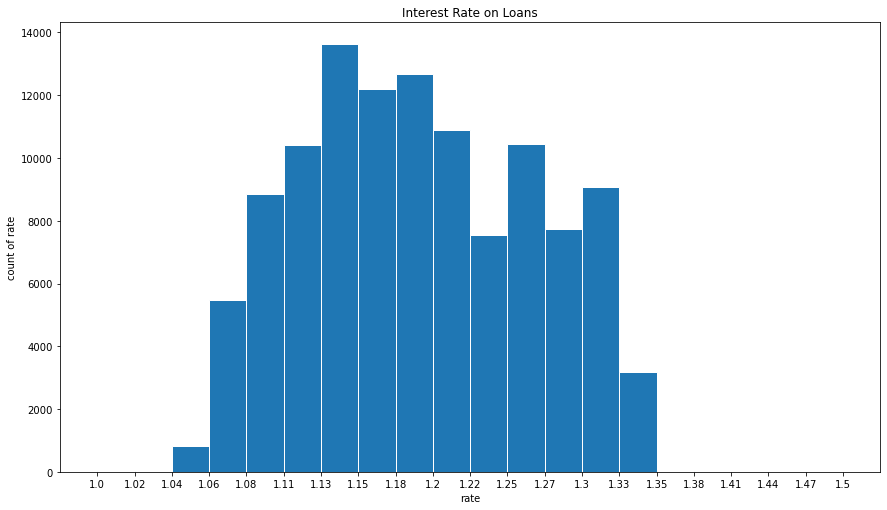

In [23]:
# Use the log10 values directly
loans["log10rate"] = np.log10(loans.BorrowerRateShifted)
# Instead, just set the number of bins (20 - 30, up to 50 if skewed)
# hist - edgecolor add borders to the bars (again, for ease of interpretation)
plt.figure(figsize=[14.70, 8.27])
n, bins, patches = plt.hist(data = loans, x  = 'log10rate',
                            bins = 20, edgecolor = "white")
# The bins are in log10, get original units
new_labels = [10**(x) for x in bins]
# round the labels (you can do this in the step above)
new_labels = [round(x,2) for x in new_labels]
# set the tick labels to be the same as the bins
plt.title('Interest Rate on Loans')
plt.xlabel('rate')
plt.ylabel('count of rate')
plt.xticks(bins,new_labels);


In [24]:
#alternate method
# set the bins based on the log10 distribution
## ... but ... change them back to original units (i.e.  10** )
bins = 10** (np.arange(0,np.log10(loans.BorrowerRateShifted.max()) + 0.01, 0.01))

# round them (to make the plot easier to interpret)
bins = [round(x,2) for x in bins]

In [25]:
print(bins)

[1.0, 1.02, 1.05, 1.07, 1.1, 1.12, 1.15, 1.17, 1.2, 1.23, 1.26, 1.29, 1.32, 1.35, 1.38, 1.41, 1.45, 1.48, 1.51]


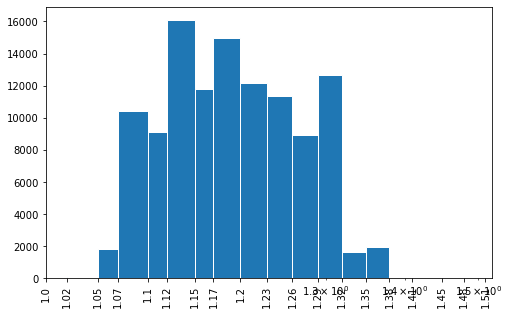

In [26]:
# hist - edgecolor add borders to the bars (again, for ease of interpretation)
plt.figure(figsize=[8,5])
n, bins, patches = plt.hist(data = loans, x  = 'BorrowerRateShifted',
                            bins = bins, edgecolor = "white")

plt.xlim([1,1.52])

plt.xscale('log')
# set the tick labels to be the same as the bins
plt.xticks(bins,bins)
plt.xticks(rotation=90);


Let look at loan amount

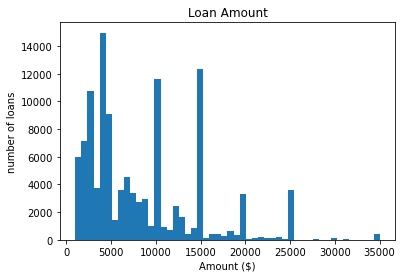

In [27]:
plt.hist(data = loans, x = 'LoanOriginalAmount', bins=50)
plt.title('Loan Amount')
plt.xlabel('Amount ($)')
plt.ylabel('number of loans')
plt.show()

The data on loan amount is highly skewed to the right and will require a log transform.  There highest peaks are around 5k,10k, and 15k.

In [28]:
loans.LoanOriginalAmount.describe()

count    113066.000000
mean       8314.762307
std        6237.007841
min        1000.000000
25%        4000.000000
50%        6300.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

In [29]:
np.log10(loans.LoanOriginalAmount.describe())

count    5.053332
mean     3.919850
std      3.794976
min      3.000000
25%      3.602060
50%      3.799341
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

The log scale of loan amounts shows that the majority of loans are around 2k to 20.5k


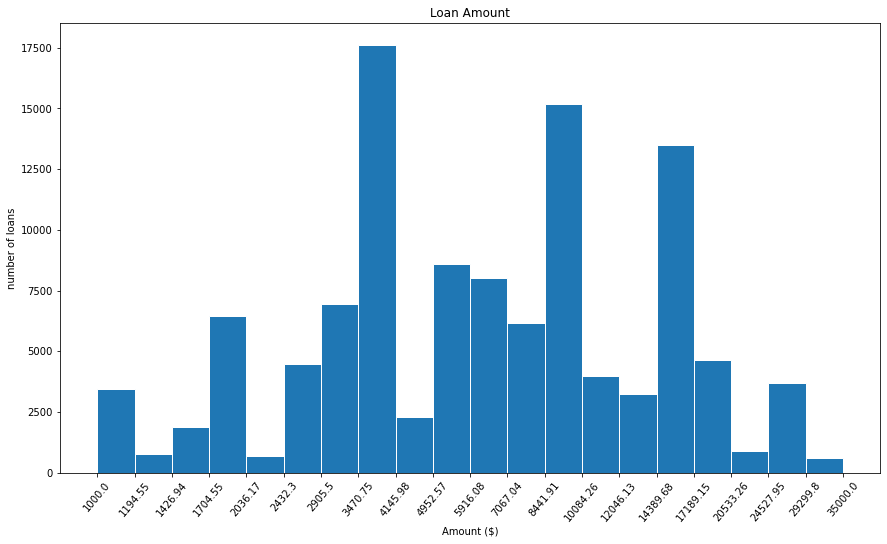

In [30]:
text = 'The log scale of loan amounts shows that the majority of loans are around 2k to 20.5k'
print(text)
# Use the log10 values directly
loans["log10amount"] = np.log10(loans.LoanOriginalAmount)
# Instead, just set the number of bins (20 - 30, up to 50 if skewed)
# hist - edgecolor add borders to the bars (again, for ease of interpretation)
plt.figure(figsize=[14.70, 8.27])
n, bins, patches = plt.hist(data = loans, x  = 'log10amount',
                            bins = 20, edgecolor = "white")
# The bins are in log10, get original units
new_labels = [10**(x) for x in bins]
# round the labels (you can do this in the step above)
new_labels = [round(x,2) for x in new_labels]
# set the tick labels to be the same as the bins
plt.title('Loan Amount')
plt.xlabel('Amount ($)')
plt.ylabel('number of loans')
plt.xticks(bins,new_labels)
plt.xticks(rotation=50);

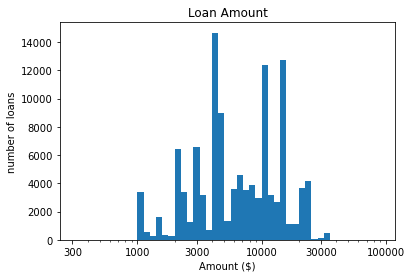

In [31]:
# axis transformation
bins = 10 ** np.arange(2.5, 5, 0.05)
ticks = [300, 10**3, 3000, 10**4, 30000, 10**5]
labels = ['{}'.format(v) for v in ticks]

plt.hist(data = loans, x= 'LoanOriginalAmount', bins = bins);
plt.title('Frequency of Diamond Prices ($, lognormal)');


# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')


# Apply x-ticks
plt.title('Loan Amount')
plt.xlabel('Amount ($)')
plt.ylabel('number of loans')
plt.xticks(ticks, labels);

In the case of loan amount, the small bin size proves very illuminating. There are very large spikes in frequency at the bars beginning with $5,000 at intervals of 5,000 all the way up to $35,000 loan amount.  Frequency quickly trails off until the next spike. These probably represent standard loan amounts


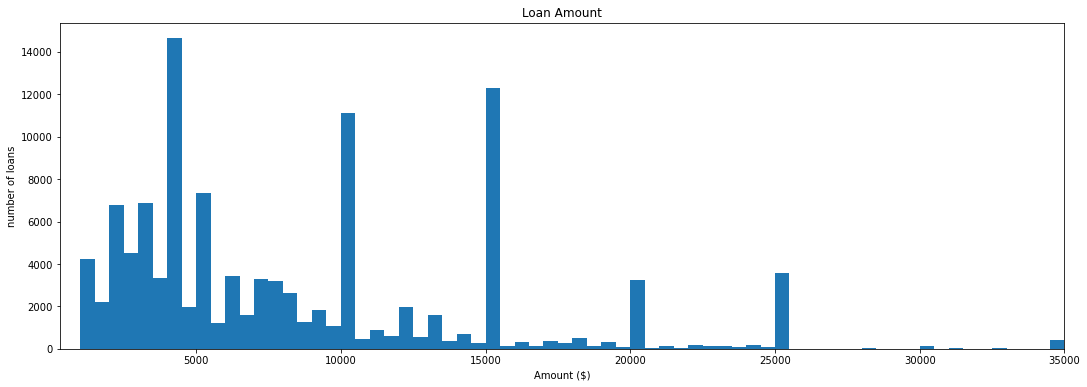

In [32]:
# univariate plot of loan amount
text = 'In the case of loan amount, the small bin size proves very illuminating. There are very large spikes in frequency at the bars beginning with $5,000 at intervals of 5,000 all the way up to $35,000 loan amount.  Frequency quickly trails off until the next spike. These probably represent standard loan amounts'
print(text)

binsize=500
bins = np.arange(0, loans['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=(18,6))
plt.hist(data = loans, x = 'LoanOriginalAmount', bins = bins)
plt.xlim([300,35000])
plt.title('Loan Amount')
plt.xlabel('Amount ($)')
plt.ylabel('number of loans')
plt.show()

In [33]:
loans.DebtToIncomeRatio.describe()

count    104594.000000
mean          0.276032
std           0.553738
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

(0.0, 2.0)

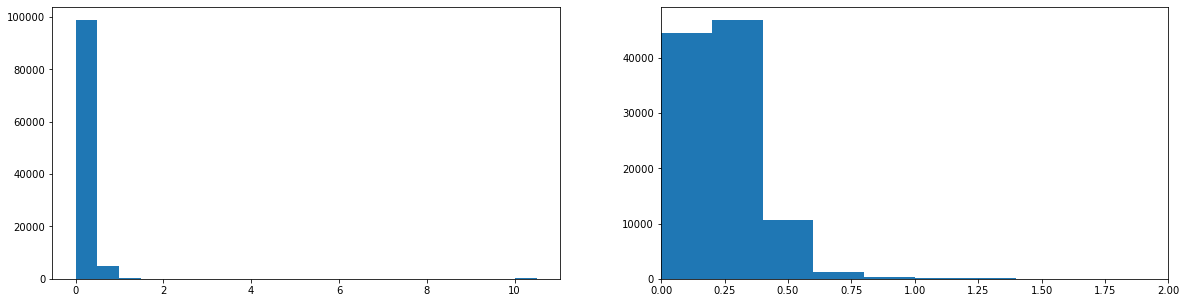

In [34]:
# Define the figure size
plt.figure(figsize = [20, 5])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loans['DebtToIncomeRatio'].max()+0.5, 0.5)
plt.hist(data=loans, x='DebtToIncomeRatio', bins = bin_edges)

# histogram on right: focus in on bulk of data < 2
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, loans['DebtToIncomeRatio'].max()+0.2, 0.2)
plt.hist(data=loans, x='DebtToIncomeRatio', bins = bin_edges)
plt.xlim(0, 2) # could also be called as plt.xlim((0, 2))

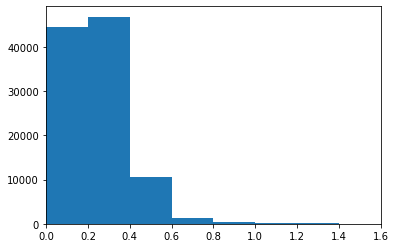

In [35]:
bins = np.arange(0, loans['DebtToIncomeRatio'].max()+0.2, 0.2)
plt.hist(data=loans, x='DebtToIncomeRatio', bins=bins);

# Set the upper and lower bounds of the bins that are displayed in the plot
# Refer here for more information - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html
# The argument represent a tuple of the new x-axis limits.
plt.xlim((0,1.6));

Most borrowers (75%) had a D/E ratio of less than .32 with almost all of the borrowers having a ratio of less than .6

In [36]:
listing_counts = loans['ListingCategory (numeric)'].value_counts()
listing_counts

1     57624
0     16965
7     10448
2      7388
3      7157
6      2568
4      2395
13     1987
15     1507
18      882
14      863
19      764
20      762
5       756
16      304
11      214
8       196
10       91
9        85
12       58
17       52
Name: ListingCategory (numeric), dtype: int64

In [37]:
listing_order = listing_counts.index
listing_order

Int64Index([1, 0, 7, 2, 3, 6, 4, 13, 15, 18, 14, 19, 20, 5, 16, 11, 8, 10, 9,
            12, 17],
           dtype='int64')

<AxesSubplot:xlabel='count', ylabel='ListingCategory (numeric)'>

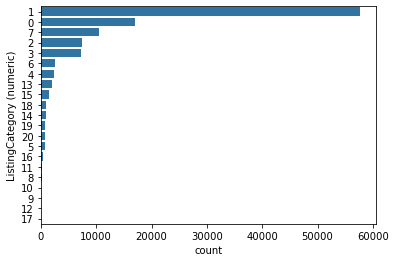

In [38]:
base_color = sb.color_palette()[0]
sb.countplot(data=loans, y='ListingCategory (numeric)', color=base_color,order=listing_order)

The majority of loans were used for debt consolidation.  

In [39]:
loans['ProsperRating (Alpha)'].value_counts()

C     18096
B     15368
A     14390
D     14170
E      9716
HR     6917
AA     5325
Name: ProsperRating (Alpha), dtype: int64

In [40]:
loan_rating = ['HR', 'E', 'D', 'C', 'B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = loan_rating)
loans['ProsperRating (Alpha)'] = loans['ProsperRating (Alpha)'].astype(ordered_var)

In [41]:
loans['ProsperRating (Alpha)'].unique()

[NaN, A, D, B, E, C, AA, HR]
Categories (7, object): [HR < E < D < C < B < A < AA]

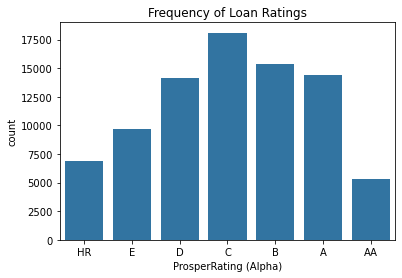

In [42]:
sb.countplot(data = loans, x = 'ProsperRating (Alpha)', color = base_color);
plt.title('Frequency of Loan Ratings');

Distribution of loans based on ProsperRating shows that most loans were rated E through A. 

In [43]:
loans.IncomeRange.value_counts()

$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
Not displayed      7741
$1-24,999          7241
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [67]:
borrower_income = ["$0", 'Not displayed', 'Not employed', '$25,000-49,999', '$50,000-74,999','$75,000-99,999','$100,000+']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = borrower_income)
loans['IncomeRange'] = loans['IncomeRange'].astype(ordered_var)

In [68]:
loans.IncomeRange.value_counts()

$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
Not displayed      7741
Not employed        806
$0                    0
Name: IncomeRange, dtype: int64

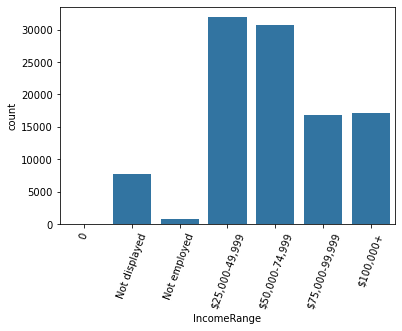

In [46]:
#income range of borrowers
base_color = sb.color_palette()[0]
sb.countplot(data=loans, x='IncomeRange', color = base_color)
plt.xticks(rotation=70);

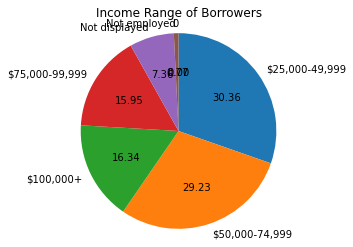

In [47]:
sorted_counts = loans['IncomeRange'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%.2f',
        counterclock = False);
plt.axis('square')
plt.title('Income Range of Borrowers')
plt.show()

TypeError: can only concatenate str (not "int") to str

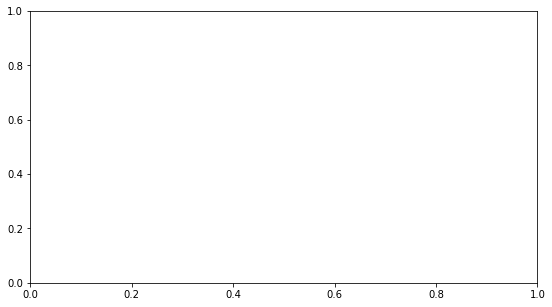

In [49]:
# Define the figure size
plt.figure(figsize = [20, 5])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loans['IncomeRange'].max()+500, 500)
plt.hist(data=loans, x='IncomeRange', bins = bin_edges)

# histogram on right: focus in on bulk of data < 2
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, loans['IncomeRange'].max()+100, 100)
plt.hist(data=loans, x='IncomeRange', bins = bin_edges)
plt.xlim(0, 2) # could also be called as plt.xlim((0, 2))

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

To visualize 2 numeric variables, scatter plot is a good option

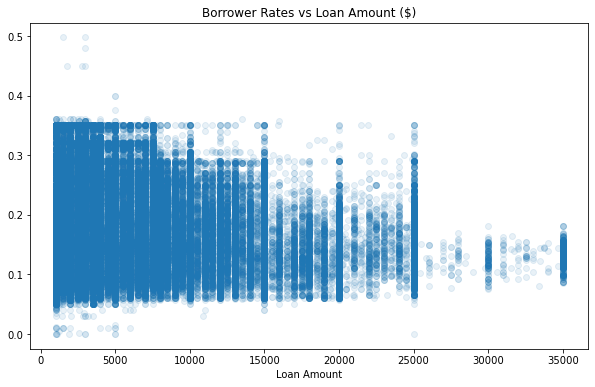

In [50]:
# rates vs loan amount
plt.figure(figsize = (10,6))
plt.scatter(data = loans, x = 'LoanOriginalAmount', y = 'BorrowerRate', alpha = 0.1)


plt.title('Borrower Rates vs Loan Amount ($)')
plt.xlabel('Loan Amount');

Interest rates for the lower loan amounts tend have a wider range than the rates on Loan Amounts at the higher end.  The highest loan amounts have some of the lowest interest rates.    

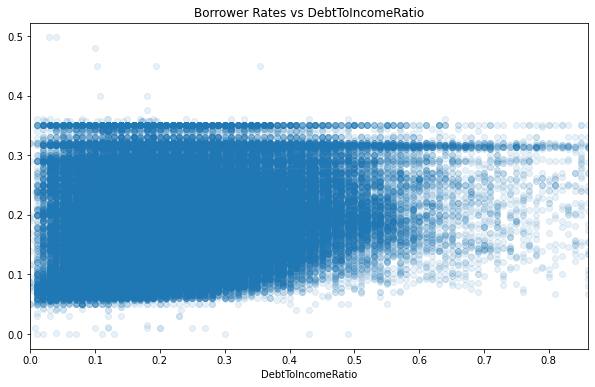

In [51]:
plt.figure(figsize = (10,6))
plt.scatter(data = loans, x = 'DebtToIncomeRatio', y = 'BorrowerRate', alpha = 0.1)


plt.xlim(0, loans.DebtToIncomeRatio.quantile(0.99))
plt.title('Borrower Rates vs DebtToIncomeRatio')
plt.xlabel('DebtToIncomeRatio');    

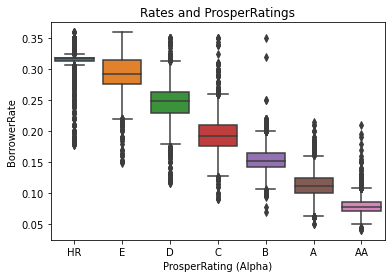

In [52]:
df = sb.boxplot(x="ProsperRating (Alpha)", y="BorrowerRate", data=loans)
plt.title('Rates and ProsperRatings');

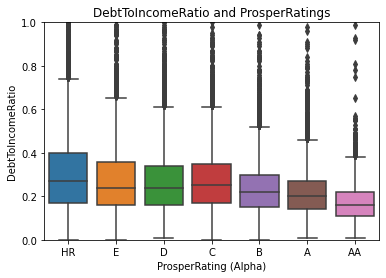

In [53]:
df = sb.boxplot(x="ProsperRating (Alpha)",y="DebtToIncomeRatio",data=loans)
plt.ylim(0, 1) 
plt.title('DebtToIncomeRatio and ProsperRatings');

Debt/Income has an inverse effect on ProsperRating

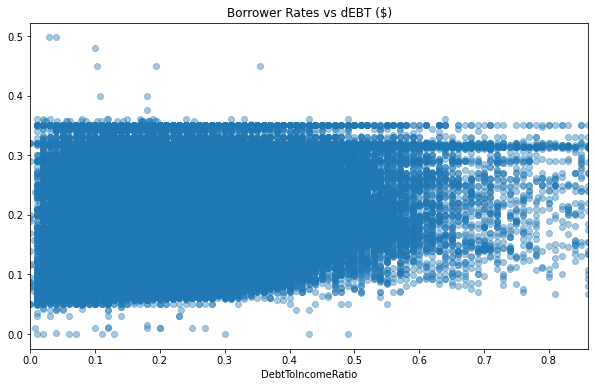

In [54]:
plt.figure(figsize = (10,6))
plt.scatter(data = loans, x = 'DebtToIncomeRatio', y = 'BorrowerRate', alpha = 0.4)
plt.xlim(0, loans.DebtToIncomeRatio.quantile(0.99))
plt.title('Borrower Rates vs dEBT ($)')
plt.xlabel('DebtToIncomeRatio');

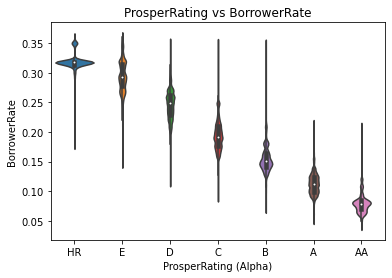

In [55]:
sb.violinplot(x="ProsperRating (Alpha)", y="BorrowerRate", data=loans)
plt.title('ProsperRating vs BorrowerRate')
plt.show()

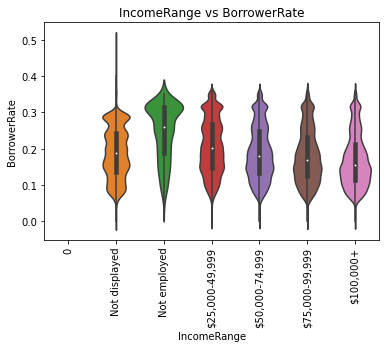

In [56]:
sb.violinplot(x="IncomeRange", y="BorrowerRate", data=loans)
plt.title('IncomeRange vs BorrowerRate')
plt.xticks(rotation=90);
plt.show()

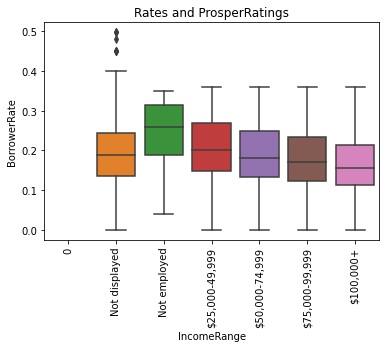

In [57]:
df = sb.boxplot(x="IncomeRange", y="BorrowerRate", data=loans)
plt.title('Rates and ProsperRatings')
plt.xticks(rotation=90);

Higher Income Range results in lower average borrower rates.

ValueError: could not convert string to float: 'A'

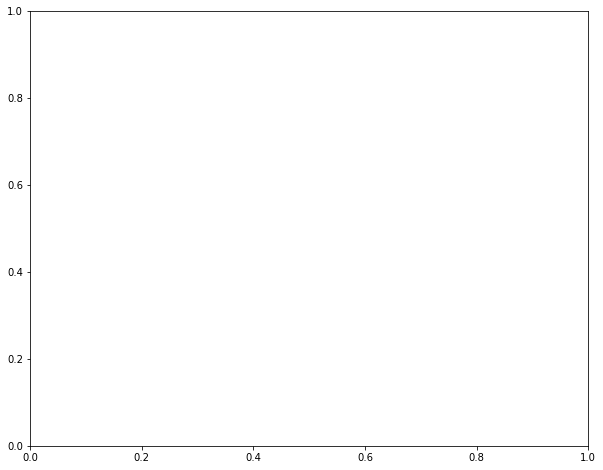

In [58]:
plt.figure(figsize=[10,8])
plt.scatter(data = loans, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', c ='ProsperScore', alpha = 0.3)
plt.colorbar(label = 'ProsperScore')
plt.title('BorrowerRate vs. ProsperRating (Alpha) & ProsperScore')
plt.xlabel('ProsperRating (Alpha)')
plt.ylabel('BorrowerRate');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!